## Task 2
In this task, we are going to explore the usage of gradient boosted trees for binary classification using python. We will use the [spam](https://hastie.su.domains/ElemStatLearn/datasets/spam.data) data, used in the Elements of Statistical learning course book. 

#### (a)
We will now give a brief overview of the python package of our choice, which loss function we are going to use and why it is suitable, and list and explain the choices of all of the parameters and settings required to train the boosting trees.


In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
# loading the data
spam_df = pd.read_csv("spam_data.txt", header=None, sep=' ')

# separating data into predictors X and labels y
X, y = np.array(spam_df.iloc[:, :-1]), np.array(spam_df.iloc[:, -1])

# separating into training and test data with a 80/20 split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### (b)
This subtask consists only of writing code to consturct trees based on the maximum number of terminal nodes. See code appendix, and the $\texttt{gradientBoostingClassifier}$ function.

In [84]:
def gradientBoostingClassifier(max_leaf_nodes = 5, max_depth = 10, verbose = 0, n_estimators = 100):
    """
    Gradient boosted tree classifier using the scikit-learn function
    GradientBoostingClassifier.

    The log_loss (binomial deviance) function is used as loss function.
    The number of features randomly selected in each split is sqrt(total # features)

    n_estimators is the effective number of trees and this is the parameter that we
    are going to tune, primarily.
    """
    model = GradientBoostingClassifier(
        loss = 'log_loss',
        max_features = 'sqrt',
        max_depth = max_depth,
        max_leaf_nodes =  max_leaf_nodes,
        n_estimators = n_estimators,
        verbose = verbose,
        random_state=0
    )
    return model

In [89]:
# examining three models where max #leaf nodes = 2, 5, 10

# specifying the range of number of trees to examine
M_values = range(10, 410, 10)
cv_errors_1 = []  # Store mean CV errors for first model
std_errors_1 = []  # Store CV standard errors of first model

cv_errors_2 = [] # second model ...
std_errors_2 = [] 

cv_errors_3 = [] # third model ...
std_errors_3 = []  

# Perform 10-fold CV for each M
for M in M_values:

    # first model cross validation errors
    model_1 = gradientBoostingClassifier(n_estimators=M, max_leaf_nodes=2) # 2-leaf model
    scores = cross_val_score(model_1, X, y, cv=10, scoring='accuracy') 
    mean_error = 1 - np.mean(scores)
    std_error = np.std(scores) / np.sqrt(len(scores))
    cv_errors_1.append(mean_error)
    std_errors_1.append(std_error)

    # second model ...
    model_2 = gradientBoostingClassifier(n_estimators=M, max_leaf_nodes=5) # 5-leaf model
    scores = cross_val_score(model_2, X, y, cv=10, scoring='accuracy') 
    mean_error = 1 - np.mean(scores)  # CV error
    std_error = np.std(scores) / np.sqrt(len(scores))
    cv_errors_2.append(mean_error)
    std_errors_2.append(std_error)

    # third model ...
    model_3 = gradientBoostingClassifier(n_estimators=M, max_leaf_nodes=10) # 10-leaf model
    scores = cross_val_score(model_3, X, y, cv=10, scoring='accuracy') 
    mean_error = 1 - np.mean(scores)  # CV error
    std_error = np.std(scores) / np.sqrt(len(scores))
    cv_errors_3.append(mean_error)
    std_errors_3.append(std_error)

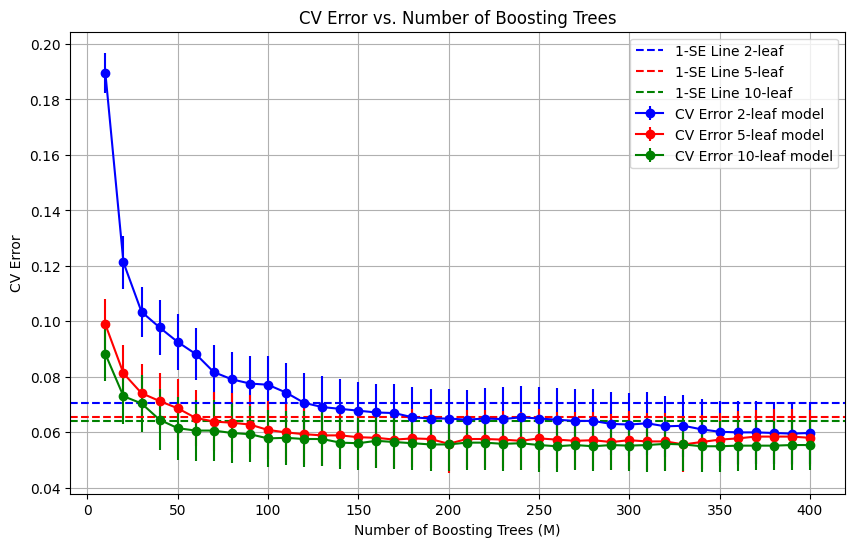

In [92]:
# Plot CV error versus number of boosting trees M
plt.figure(figsize=(10, 6))
plt.errorbar(M_values, cv_errors_1, yerr=std_errors_1, fmt='-o', label='CV Error 2-leaf model', color='blue')
plt.errorbar(M_values, cv_errors_2, yerr=std_errors_2, fmt='-o', label='CV Error 5-leaf model', color = 'red')
plt.errorbar(M_values, cv_errors_3, yerr=std_errors_3, fmt='-o', label='CV Error 10-leaf model', color = 'green')
plt.xlabel('Number of Boosting Trees (M)')
plt.ylabel('CV Error')
plt.title('CV Error vs. Number of Boosting Trees')
plt.axhline(min(cv_errors_1) + std_errors_1[np.argmin(cv_errors_1)], color='blue', linestyle='--', label='1-SE Line 2-leaf')
plt.axhline(min(cv_errors_2) + std_errors_2[np.argmin(cv_errors_2)], color='red', linestyle='--', label='1-SE Line 5-leaf')
plt.axhline(min(cv_errors_3) + std_errors_3[np.argmin(cv_errors_3)], color='green', linestyle='--', label='1-SE Line 10-leaf')
plt.legend()
plt.grid()
plt.show()